# MyWebshop

You just became the new IT Operations Manager of the MyWebshop Company. Unfortunately, MyWebshop has some stability issues as of late. You hypothesise that part of the stability issues are caused by capacity constraints. You petition the CIO to introduce a clear Capacity Management process to validate this hypothesis. The CIO agrees and arranges priority and budget. The architect provides you with the solution architecture (shown below) and your engineers already identified the key usage, utilisation and consumption metrics that drive the IT solution. All the data you need is provided in the csv files and the assignment guide is found below (with the actions marked with bullet points). 
Good luck!

<img src="images/Architecture.png" height="500" width="500" /><p></p>
The dataset contains the following metrics per server type:
<img src="images/Metrics.png" height="300" width="300" /> </p></p>
Do all the following exercises for all server types: web, app and DB.

### Get the data

The first thing to do is get the csv file and put it into a format that is most handy to do statistics on. We suggest converting the csv table into a dataframe.
But before that, we need some libraries. Handling datasets in Python is best done with the "pandas" library. You can convert the csv file into a dataframe using Pandas. 
* Import the pandas library.
* Find and run the function within pandas to convert your csv's into a dataframe.
* Use to dataframe.name function to give the dataframe a name.

In [3]:
import pandas as pd

In [12]:
# pandas.read_csv: Read CSV (comma-separated file into DataFrame)
df_database = pd.read_csv("../data/database_server.csv")
df_database.name = 'Database'
df_application = pd.read_csv("../data/app_server.csv")
df_application.name = 'Application'
df_webserver = pd.read_csv("../data/web_server.csv")
df_webserver.name = 'Webserver'

The next thing to do is checking the data to make sure if it is really a data frame, and what it contains. After that, it is always a good idea to plot the dataset, as human beings are visual creatures. We understand the problem better if we can visualize it. It's always good to start simple, like this:

* Print on the screen a sample of the dataset you have. (Say, print 5 rows of the dataset * and see if it is correctly imported.)
* How many rows do you have?
* Do your columns have names?

In [13]:
print(df_database.head(5))
print("\nNumber of Instances = " + str(len(df_database)))

              DT    VPH    TPH   CPU   MEM    IO  StorageGB  StorageCapacityGB
0  1/1/2014 0:00  49299  17579  16.8  24.7  24.3   4.770048                 64
1  1/1/2014 1:00  28372   9092  16.5  22.5  14.6   4.770915                 64
2  1/1/2014 2:00   6528   2051  12.5  25.6  13.6   4.771111                 64
3  1/1/2014 3:00   1291    463  16.2  20.4   5.5   4.771155                 64
4  1/1/2014 4:00   4709   1588  15.7  23.8   7.5   4.771306                 64

Number of Instances = 8760


### Formats, formats, formats...

* Check the type of the columns to see if certain columns need conversions.

With any programming language, dates and times should be handled with care. Python is no exception. There is a special library in Python to handle "datetime" type of data. 
* Find the appropriate library.
* Make sure to convert the relevant columns into the datetime type. You might want to give it a specific format as well.
* Always check if your converted data is in the right format!

In [29]:
print(df_database['DT'].dtype)
print(df_database['CPU'].dtype)

object
float64


In [30]:
df_database['DT'] = pd.to_datetime(df_database['DT'], format="%m/%d/%Y %H:%M")
df_application['DT'] = pd.to_datetime(df_application['DT'], format="%m/%d/%Y %H:%M")
df_webserver['DT'] = pd.to_datetime(df_webserver['DT'], format="%m/%d/%Y %H:%M")
print(df_webserver['DT'].dtype)

datetime64[ns]


### Visualize your data

It is time to visualize our dataset. Look at the sample data you just printed on your screen. What makes sense to you? 

We have a time series dataset, that is a series of data points taken at successive equally spaced points in time. In our case, we have hourly data. I would suggest visualizing every metric as a function of time to see what the whole time series looks like per metric. We can then try to think of more clever ways to visualize the data.
* Plot every metric as  a function of time. Use scatter plotting for a more clear visualization rather than a line plot.
* Which library do you need for a scatter plot?

In [31]:
%matplotlib inline 
#  With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

import matplotlib.pyplot as plt

There is a bunch of problems when making a plot with scatter when you have datetime formats. It looks like scatter takes only numeric values in its x axis. Please see the following conversation in stackoverflow:
    
https://stackoverflow.com/questions/27472548/pandas-scatter-plotting-datetime/29737663

We used the following trick:

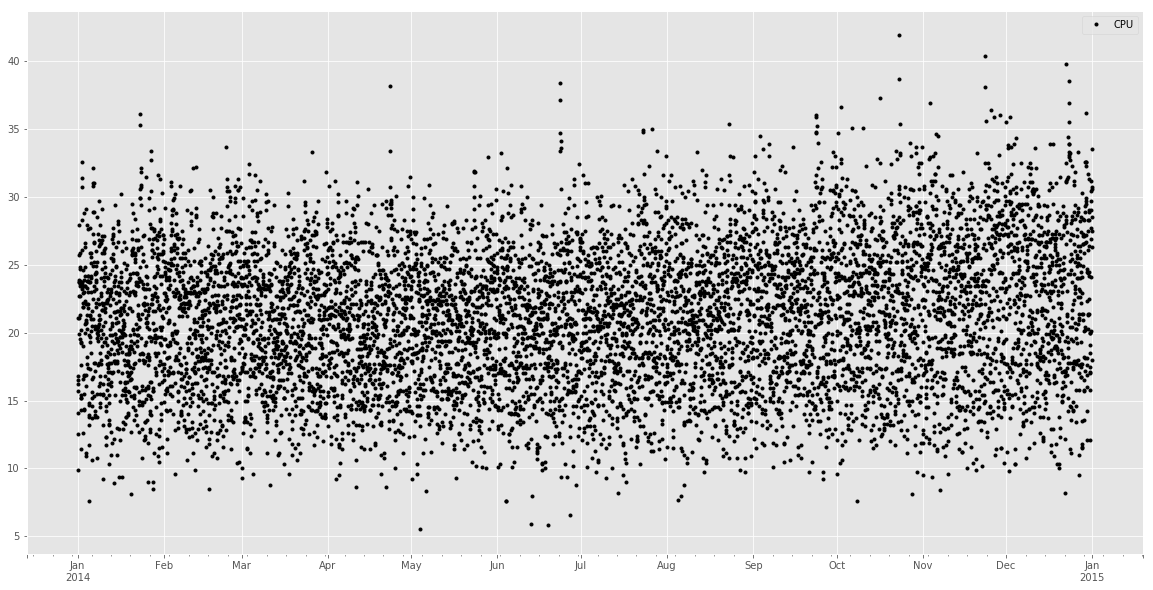

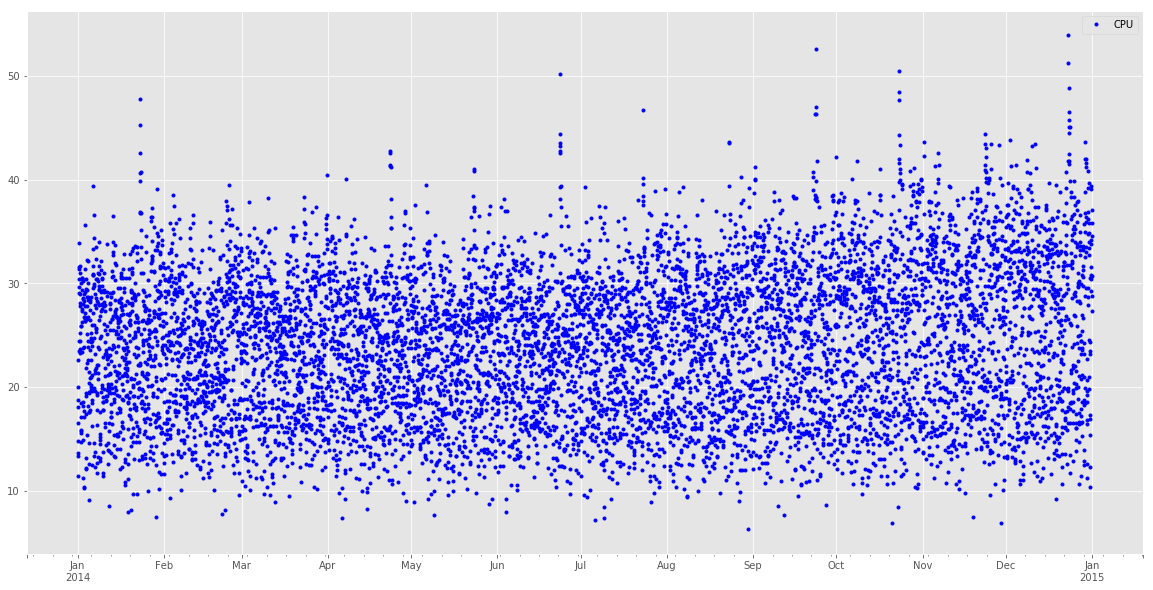

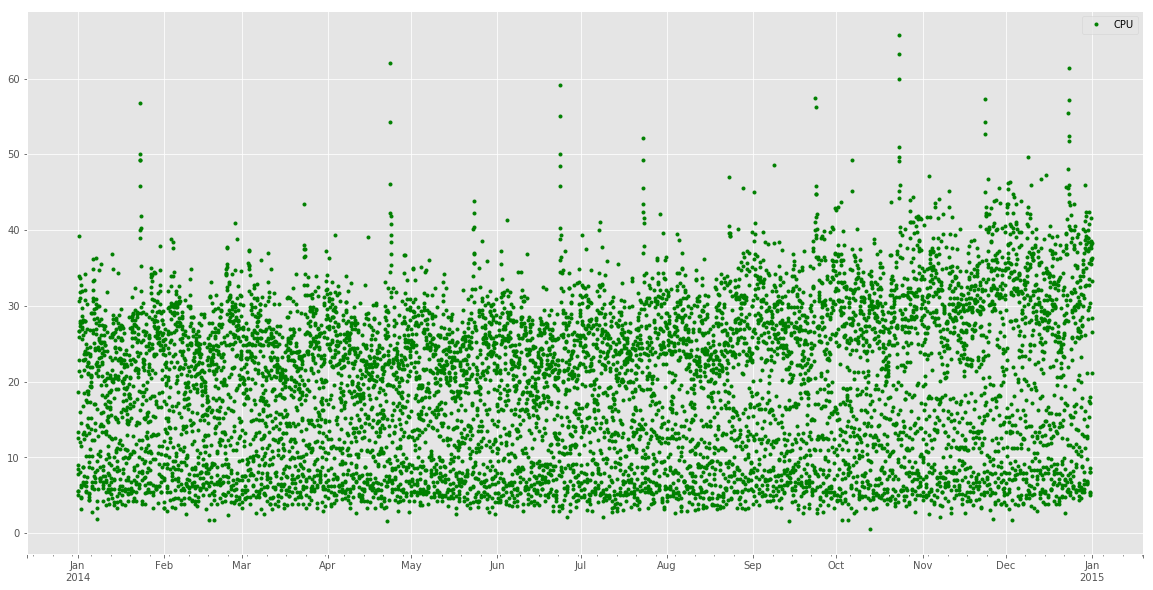

In [32]:
datasets = [df_database, df_application, df_webserver]
colors = ["black", "blue", "green"]
for i in range(0, len(datasets)):
    datasets[i].plot(x='DT', y='CPU', style=".", color=colors[i], figsize=(20,10))
    plt.xlabel("")

Another one can be:

datetime64[ns]


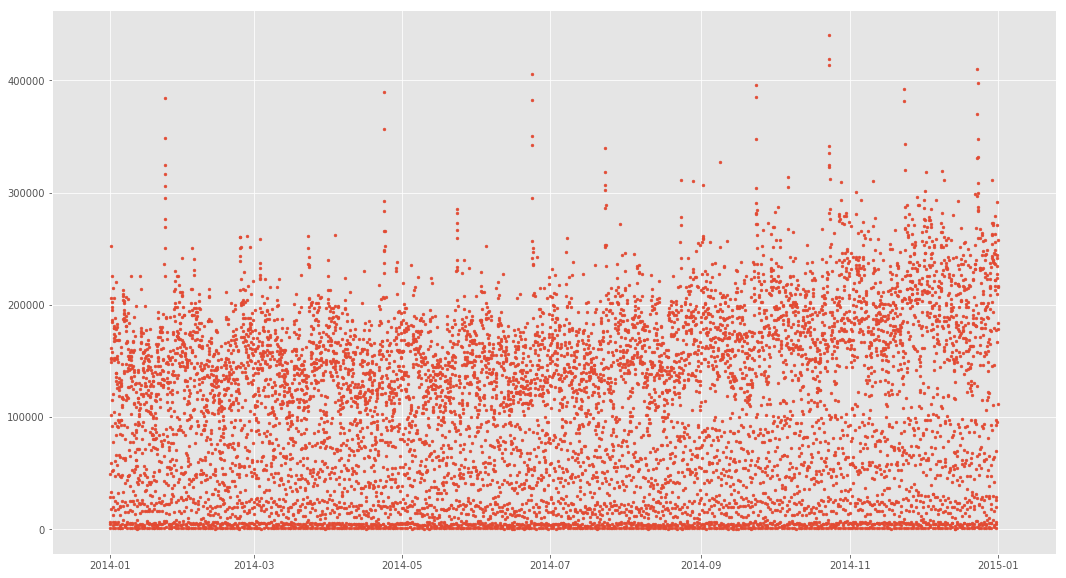

In [33]:
datetime = df_webserver['DT']
datetime = datetime.values.reshape(len(datetime), 1)
print(datetime.dtype)
vph = df_webserver['VPH']
vph = vph.values.reshape(len(vph), 1)
plt.figure(figsize=(18, 10))
_=plt.scatter(datetime, vph, s=8)

What do you observe from your scatter data? What do you think is a better way to visualize it so that you can discover more? Do you also see the peaks almost regularly every month? What is that about?

* Plot the systems utilization (CPU, MEM and IO) in realtion to the visits per hour. Do so for all three systems to get insight of possible ressource shortcomings.
* Plot a threshold line at 85% for beter visual presentation.

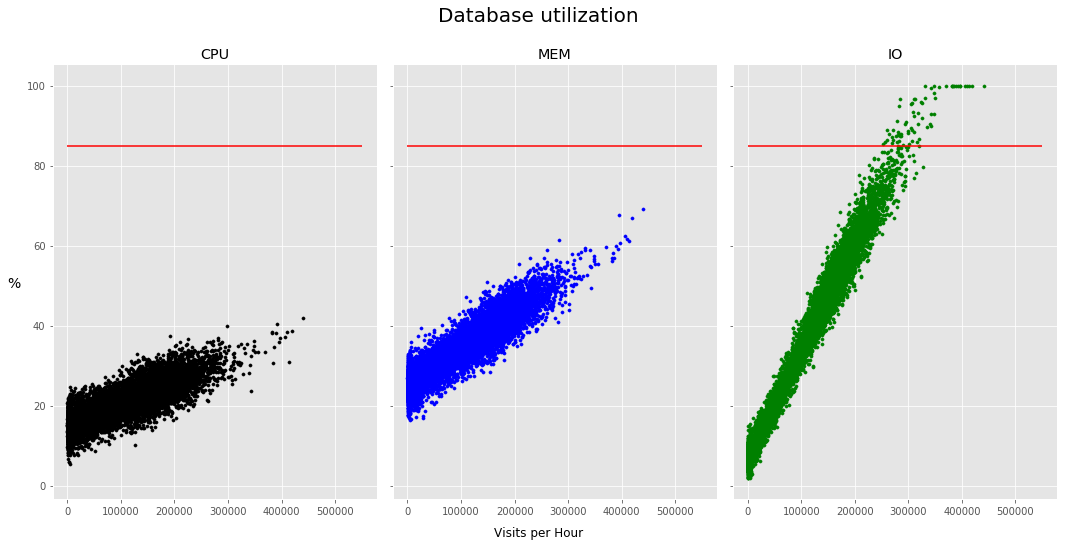

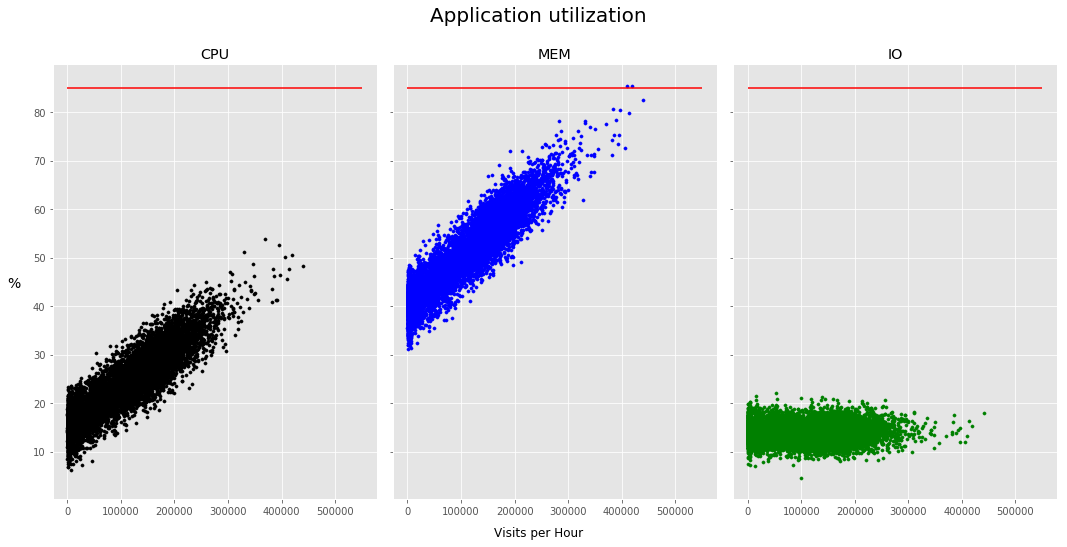

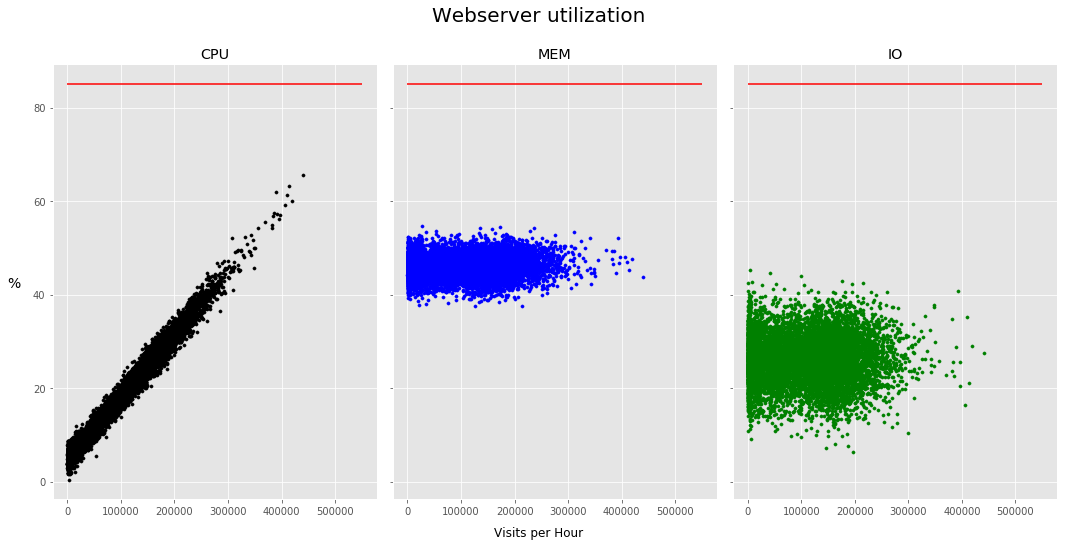

In [34]:
# Plot systems utilization in relation to the visits per hour
utilizations = ["CPU", "MEM", "IO"]
for i in range(0, len(datasets)):
    fig, ax = plt.subplots(1, 3, figsize=(18,8), sharey=True)
    fig.subplots_adjust(hspace=0.0, wspace=0.05)
    fig.suptitle(datasets[i].name + " utilization", fontsize = 20)
    fig.text(0.5, 0.06, 'Visits per Hour', ha='center', fontsize = 12)
    fig.text(0.09, 0.5, '%', va='center', fontsize = 14)
    for j in range(0, len(utilizations)):
        vph = datasets[i]['VPH']
        feature = datasets[i][utilizations[j]]
        color=colors[j]
        ax[j].scatter(vph, feature, s=10, color=color)
        ax[j].hlines(y=85, xmin=0, xmax=550000, colors='r')
        ax[j].set_title(utilizations[j])

After creating plot for the systems utilization we know now about possible shortcomings of resources. What we don't is on when they occur. To solve these kind of problems I
always add calendar features to time series data to see if there is any seasonality - different behavior based on day of the week, day of the month, hour of the day, etc. Let's try to discover such patterns.

* Add hour of the day, day of the week, day of the month and month of year features into your dataset. They will be new columns in your dataframe. Per row, you will want to get values for these columns.

In [35]:
# Again we use the datasets list created earlier to minimize the lines of code.
for i in range(0, len(datasets)):
    datasets[i]['DoW'] = datasets[i]['DT'].dt.weekday_name
    datasets[i]['DoM'] = datasets[i]['DT'].dt.day
    datasets[i]['HoD'] = datasets[i]['DT'].dt.hour
    datasets[i]['MoY'] = datasets[i]['DT'].dt.strftime('%b')
print(df_database.tail(5))

                      DT     VPH    TPH   CPU   MEM    IO  StorageGB  \
8755 2014-12-31 19:00:00  215578  82177  26.3  45.2  70.3  35.301073   
8756 2014-12-31 20:00:00  216631  70125  28.5  43.0  65.1  35.307760   
8757 2014-12-31 21:00:00  257926  87147  30.7  51.9  74.3  35.316071   
8758 2014-12-31 22:00:00  178395  64103  30.6  33.4  60.9  35.322185   
8759 2014-12-31 23:00:00  111435  37002  18.0  32.8  35.8  35.325714   

      StorageCapacityGB        DoW  DoM  HoD  MoY  
8755                 64  Wednesday   31   19  Dec  
8756                 64  Wednesday   31   20  Dec  
8757                 64  Wednesday   31   21  Dec  
8758                 64  Wednesday   31   22  Dec  
8759                 64  Wednesday   31   23  Dec  


In [36]:
import numpy as np

In [37]:
# For ordering purposes in the plots we add some more lists/arrays
DayofWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MonthsofYear = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
DayofMonth = np.array(range(1, 32))

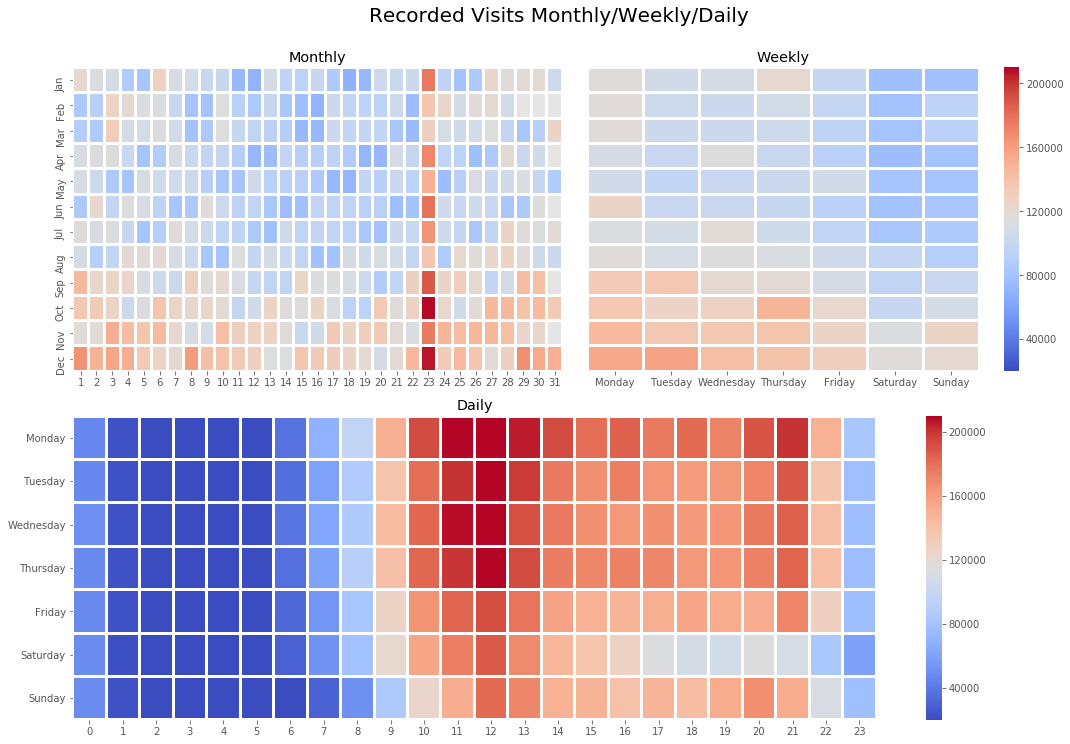

In [38]:
import seaborn as sns

df_heat_yearly = pd.pivot_table(data = df_webserver, index='MoY', values='VPH', columns='DoM', aggfunc=np.mean)
ix = pd.Categorical(df_heat_yearly.index, MonthsofYear)
ix = ix.sort_values(ascending=True)
df_heat_yearly = df_heat_yearly.loc[ix]

df_heat_monthly = pd.pivot_table(data = df_webserver, index='MoY', values='VPH', columns='DoW', aggfunc=np.mean)
ix = pd.Categorical(df_heat_monthly.index, MonthsofYear)
ix = ix.sort_values(ascending=True)
df_heat_monthly = df_heat_monthly.loc[ix]
df_heat_monthly = df_heat_monthly[DayofWeek]

df_heat_daily = pd.pivot_table(data=df_webserver, index='DoW', values='VPH', columns="HoD", aggfunc=np.mean)
ix = pd.Categorical(df_heat_daily.index, DayofWeek)
ix = ix.sort_values(ascending=True)
df_heat_daily = df_heat_daily.loc[ix]

gridsize = (10, 2)
fig = plt.figure(figsize=(18, 12))
fig.subplots_adjust(hspace=1.8, wspace=0.05)
fig.suptitle('Recorded Visits Monthly/Weekly/Daily', fontsize=20, x=0.5, y=0.95)
ax1 = plt.subplot2grid(gridsize, (0, 0), rowspan=5)
ax2 = plt.subplot2grid(gridsize, (0, 1), rowspan=5)
ax3 = plt.subplot2grid(gridsize, (5, 0), colspan=2, rowspan=5)
sns.heatmap(df_heat_yearly, cmap='coolwarm', linewidths=2, ax=ax1, vmin=20000, vmax=210000, cbar=False, yticklabels=True)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Monthly')
sns.heatmap(df_heat_monthly, cmap='coolwarm', linewidths=2, ax=ax2, vmin=20000, vmax=210000, yticklabels=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Weekly')
sns.heatmap(df_heat_daily, cmap='coolwarm', linewidths=2, ax=ax3, vmin=20000, vmax=210000, cbar=True)
ax3.set_xlabel('')
ax3.set_ylabel('')
_ = ax3.set_title('Daily')

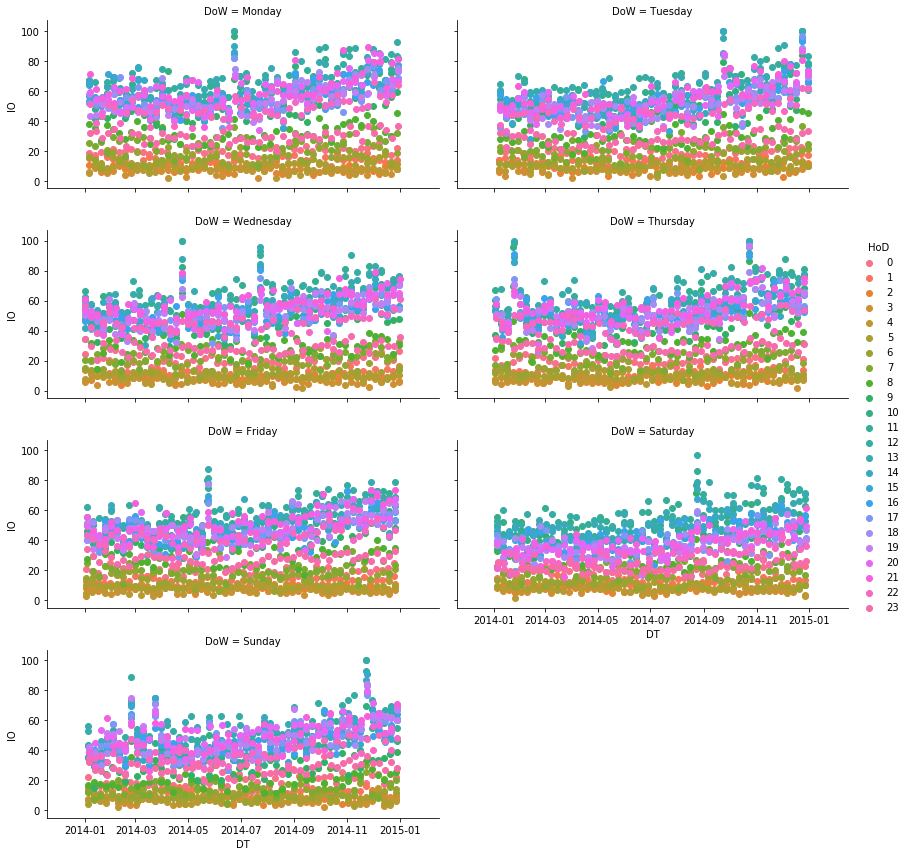

In [14]:
fg = sns.FacetGrid(data=df_database, col='DoW', col_order=DayofWeek, col_wrap=2, hue='HoD', aspect=2)
_ =fg.map(plt.scatter, 'DT', 'IO').add_legend()

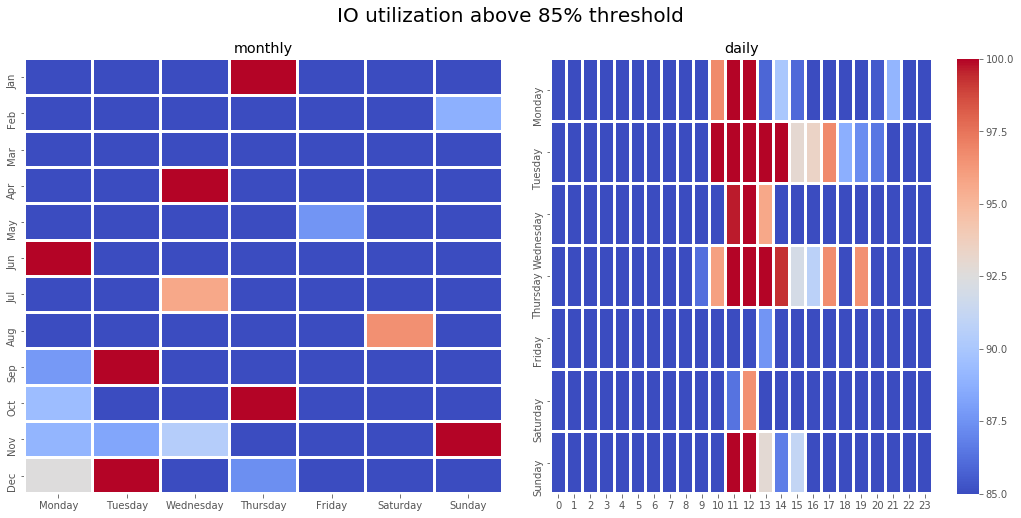

In [39]:
df_heat_monthly_io = pd.pivot_table(data = df_database, index='MoY', values='IO', columns='DoW', aggfunc=max)
ix = pd.Categorical(df_heat_monthly_io.index, MonthsofYear)
ix = ix.sort_values(ascending=True)
df_heat_monthly_io = df_heat_monthly_io.loc[ix]
df_heat_monthly_io = df_heat_monthly_io[DayofWeek]

df_heat_weekly_io = pd.pivot_table(data = df_database, index='DoW', values='IO', columns='HoD', aggfunc=max)
ix = pd.Categorical(df_heat_weekly_io.index, DayofWeek)
ix = ix.sort_values(ascending=True)
df_heat_weekly_io = df_heat_weekly_io.loc[ix]

fig, ax = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle('IO utilization above 85% threshold', fontsize=20, x=0.5, y=0.97)
fig.subplots_adjust(hspace=1.8, wspace=0.1)
sns.heatmap(df_heat_monthly_io, cmap='coolwarm', linewidths=2, vmin=85, vmax=100, ax=ax[0], cbar=False)
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].set_title("monthly")
sns.heatmap(df_heat_weekly_io, cmap='coolwarm', linewidths=2, vmin=85, vmax=100, ax=ax[1])
ax[1].set_xlabel("")
ax[1].set_ylabel("")
_ = ax[1].set_title("daily")

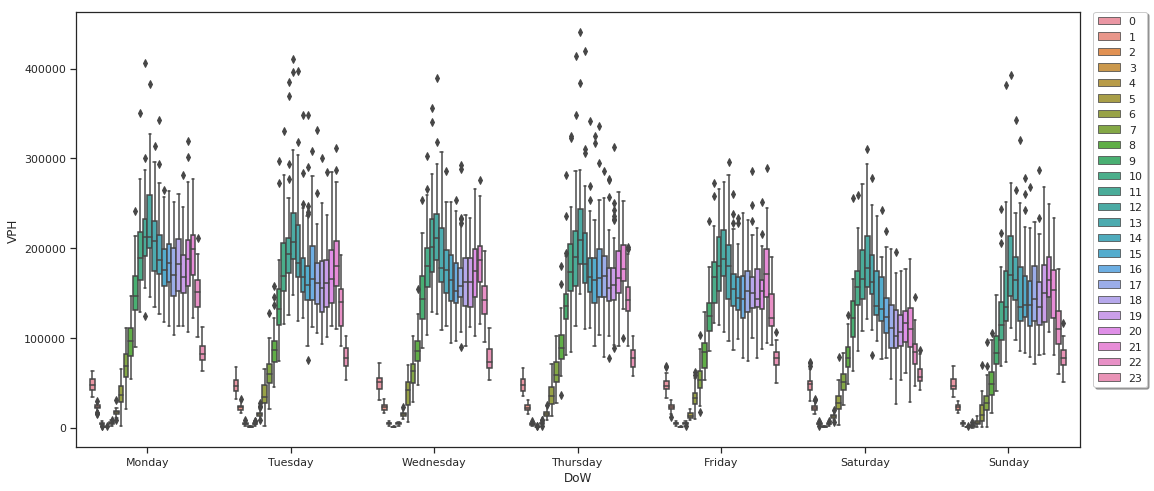

In [41]:
plt.rcParams['figure.figsize'] = [18, 8]
plt.style.use('ggplot')

sns.set(style="ticks", palette="dark")
p1= sns.boxplot(x="DoW", y="VPH",
            hue="HoD",order=DayofWeek,
            data=df_database)
_ =p1.legend(loc='upper center',  bbox_to_anchor=(1.04, 1.014), shadow=True, ncol=1)

In [158]:
predict_me = np.array([
    [90], 
    [75], 
    [100], 
    [99], 
    [30],
    [25],
    [67]
])

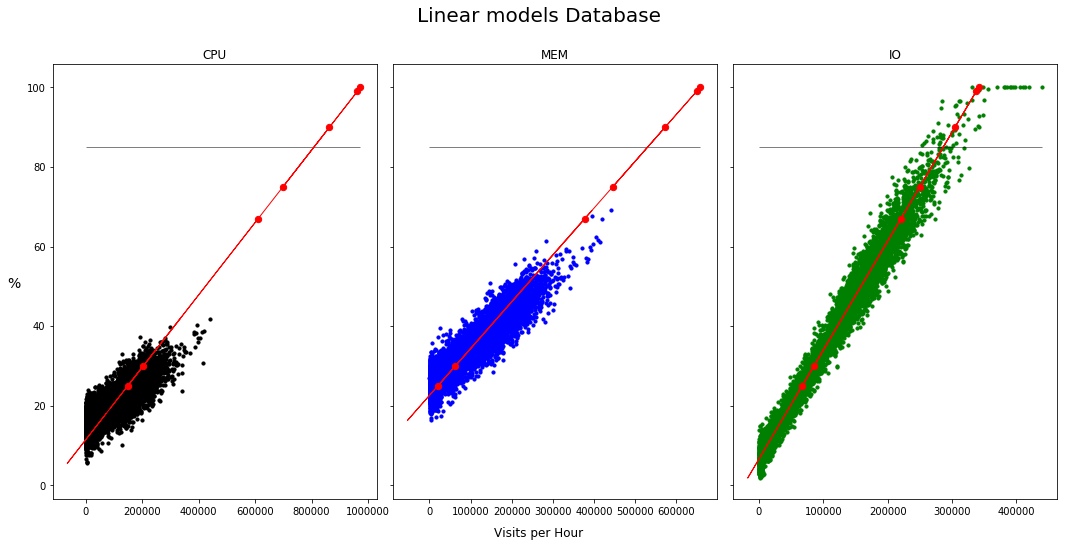

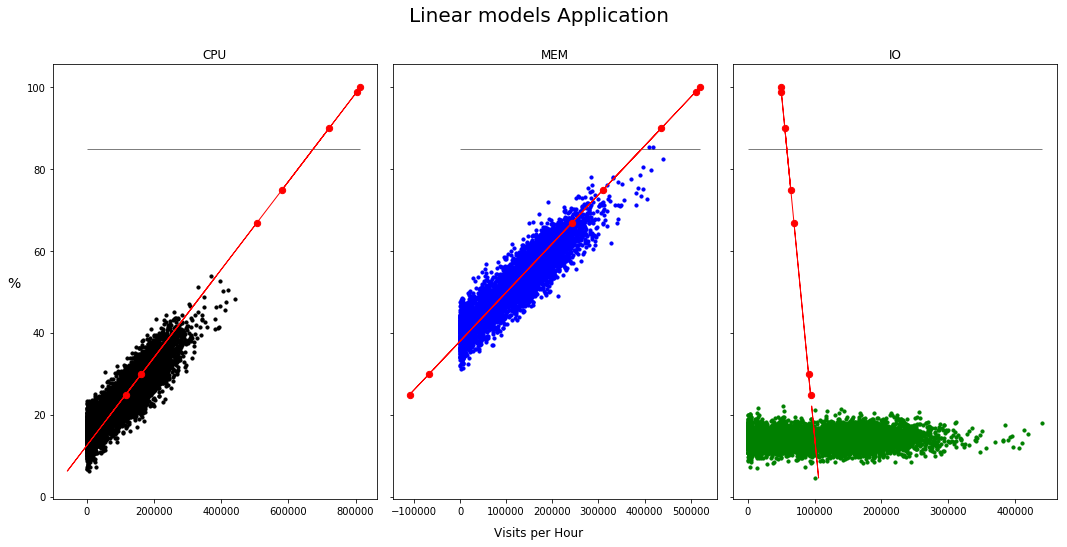

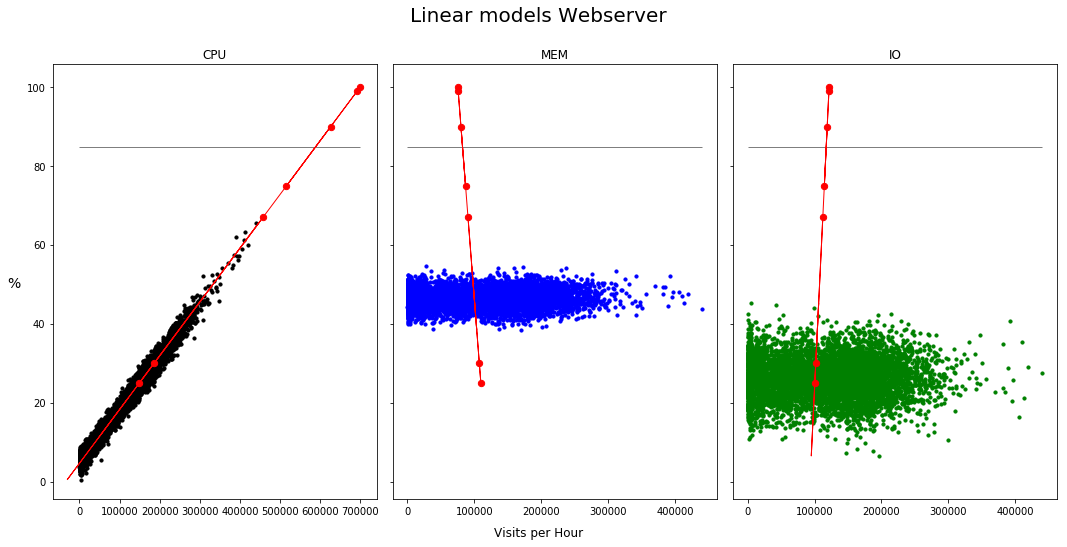

In [164]:
from sklearn import linear_model

utilizations = ["CPU", "MEM", "IO"]
for i in range(0, len(datasets)):
    fig, ax = plt.subplots(1, 3, figsize=(18,8), sharey=True)
    fig.subplots_adjust(hspace=0.0, wspace=0.05)
    fig.suptitle("Linear models" + " " + datasets[i].name, fontsize = 20)
    fig.text(0.5, 0.06, 'Visits per Hour', ha='center', fontsize = 12)
    fig.text(0.09, 0.5, '%', va='center', fontsize = 14)
    for j in range(0, len(utilizations)):
        vph = datasets[i]['VPH']
        vph = vph.values.reshape(len(vph), 1)
        feature = datasets[i][utilizations[j]]
        feature = feature.values.reshape(len(feature), 1)
        color = colors[j]
        vph_train = vph[:-6570]
        vph_test = vph[-6570:]
        feature_train = feature[:-6570]
        feature_test = feature[-6570:]
        regr_feature = linear_model.LinearRegression()
        lm_feature = regr_feature.fit(feature_train, vph_train)
        vph_predicted = lm_feature.predict(predict_me)
        ax[j].scatter(vph_test, feature_test, s=10, color=color)
        ax[j].scatter(vph_predicted, predict_me, s =40, color='red')
        ax[j].plot(lm_feature.predict(feature_test), feature_test, color='red', linewidth=1)
        ax[j].plot(vph_predicted, predict_me, color='red', linewidth=1)
        if max(vph_predicted) > max(vph):
            xmax = max(vph_predicted)
        else:
            xmax = max(vph)
        ax[j].hlines(y=85, xmin=0, xmax=xmax, color='black', linewidth=0.5)
        ax[j].set_title(utilizations[j])